In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import talib as ta
import datetime

In [22]:
## 1. Download 15 yrs DJIA
start = datetime.datetime(2002, 6, 1)
end = datetime.datetime(2017, 6, 1)

spy = data.DataReader('DIA',  'google', start, end)
#data = data['Close']
#returns = np.log(data / data.shift(1))

###
spy.head()

,Open,High,Low,Close,Volume
Date,,,,,
2002-06-03,99.28,100.11,96.91,96.95,5588900
2002-06-04,96.98,97.70,96.11,97.11,5579900
2002-06-05,97.28,98.30,97.10,98.23,3744400
2002-06-06,98.12,98.20,96.15,96.53,4836400
2002-06-07,95.32,96.65,94.87,96.22,5885900


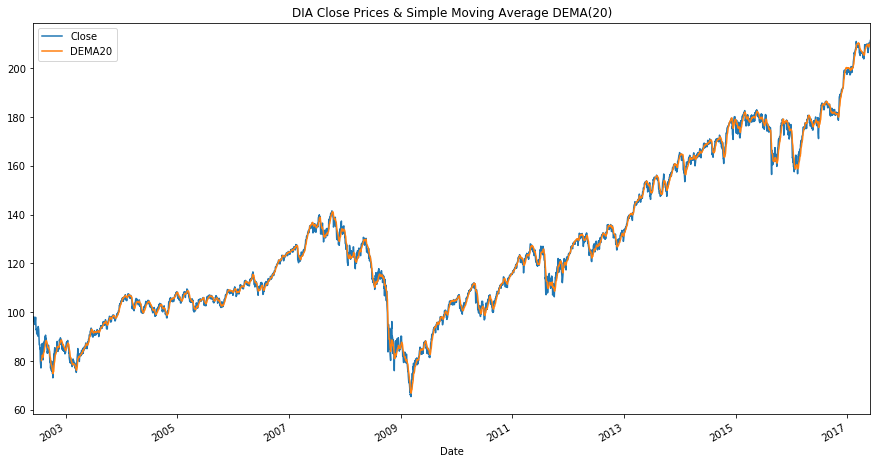

In [23]:
# 2. Simple Moving Average SMA(20) Calculation and Chart
# Technical Indicator Calculation

spy['DEMA20'] = ta.DEMA(np.asarray(spy['Close']), 20)

# Technical Indicator Chart
spy.plot(y=['Close', 'DEMA20'],figsize=(15,8))
plt.title('DIA Close Prices & Simple Moving Average DEMA(20)')
plt.legend(loc='upper left')
plt.show()

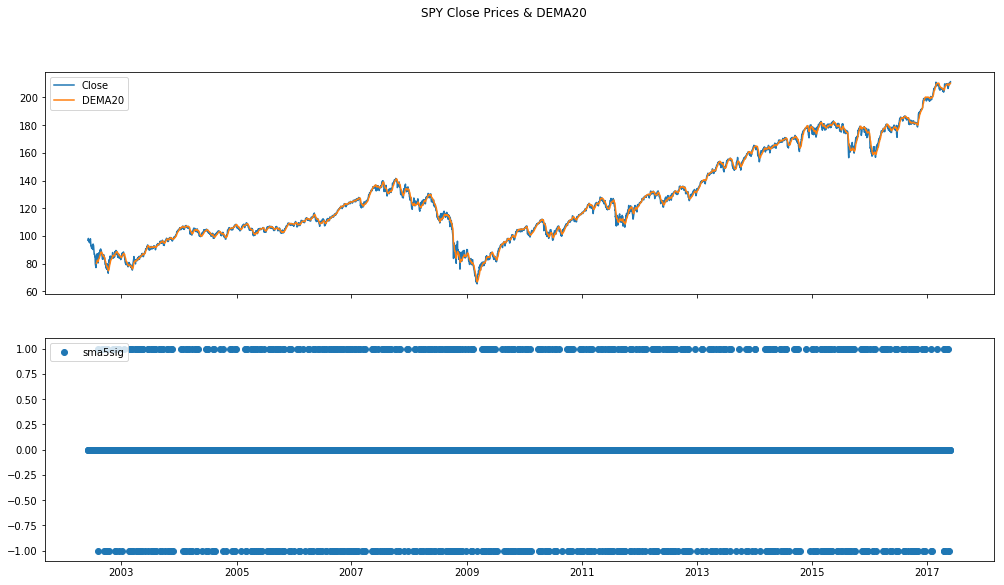

In [96]:
# 3. Price Crossover Trading Signals
# Previous Periods Data (avoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['DEMA20(-1)'] = spy['DEMA20'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['DEMA20(-2)'] = spy['DEMA20'].shift(2)

# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
spy['sma5sig'] = 0
sma5sig = 0

for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['DEMA20(-2)'] and r[1]['Close(-1)'] > r[1]['DEMA20(-1)']:
        sma5sig = 1
    elif r[1]['Close(-2)'] > r[1]['DEMA20(-2)'] and r[1]['Close(-1)'] < r[1]['DEMA20(-1)']:
        sma5sig = -1
    else:
        sma5sig = 0
    spy.iloc[i, 10] = sma5sig
    
    
# Trading Signals Chart
fig1, ax = plt.subplots(2, sharex=True, figsize=(17,9))
ax[0].plot(spy['Close'])
ax[0].plot(spy['DEMA20'])
ax[0].legend(loc='upper left')
ax[1].plot(spy['sma5sig'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & DEMA20')
plt.show()

In [100]:
spy['sma5sig']

Date
2002-06-03    0
2002-06-04    0
2002-06-05    0
2002-06-06    0
2002-06-07    0
2002-06-10    0
2002-06-11    0
2002-06-12    0
2002-06-13    0
2002-06-14    0
2002-06-17    0
2002-06-18    0
2002-06-19    0
2002-06-20    0
2002-06-21    0
2002-06-24    0
2002-06-25    0
2002-06-26    0
2002-06-27    0
2002-06-28    0
2002-07-01    0
2002-07-02    0
2002-07-03    0
2002-07-05    0
2002-07-08    0
2002-07-09    0
2002-07-10    0
2002-07-11    0
2002-07-12    0
2002-07-15    0
             ..
2017-04-20    0
2017-04-21   -1
2017-04-24    1
2017-04-25   -1
2017-04-26    0
2017-04-27    0
2017-04-28    0
2017-05-01    0
2017-05-02    0
2017-05-03    0
2017-05-04    0
2017-05-05    0
2017-05-08    0
2017-05-09    0
2017-05-10    0
2017-05-11    1
2017-05-12    0
2017-05-15    0
2017-05-16   -1
2017-05-17    0
2017-05-18    1
2017-05-19    0
2017-05-22    0
2017-05-23    0
2017-05-24   -1
2017-05-25    0
2017-05-26    0
2017-05-30    0
2017-05-31    0
2017-06-01    0
Name: sma5sig, dtyp

In [98]:
spy['sma5sig2']

Date
2002-06-03    0
2002-06-04    0
2002-06-05    0
2002-06-06    0
2002-06-07    0
2002-06-10    0
2002-06-11    0
2002-06-12    0
2002-06-13    0
2002-06-14    0
2002-06-17    0
2002-06-18    0
2002-06-19    0
2002-06-20    0
2002-06-21    0
2002-06-24    0
2002-06-25    0
2002-06-26    0
2002-06-27    0
2002-06-28    0
2002-07-01    0
2002-07-02    0
2002-07-03    0
2002-07-05    0
2002-07-08    0
2002-07-09    0
2002-07-10    0
2002-07-11    0
2002-07-12    0
2002-07-15    0
             ..
2017-04-20    0
2017-04-21    0
2017-04-24    0
2017-04-25    0
2017-04-26    0
2017-04-27    0
2017-04-28    0
2017-05-01    0
2017-05-02    0
2017-05-03    0
2017-05-04    0
2017-05-05    0
2017-05-08    0
2017-05-09    0
2017-05-10    0
2017-05-11    0
2017-05-12    0
2017-05-15    0
2017-05-16    0
2017-05-17    0
2017-05-18    0
2017-05-19    0
2017-05-22    0
2017-05-23    0
2017-05-24    0
2017-05-25    0
2017-05-26    0
2017-05-30    0
2017-05-31    0
2017-06-01    0
Name: sma5sig2, dty

In [99]:
spy

,Open,High,Low,Close,Volume,DEMA20,Close(-1),DEMA20(-1),Close(-2),DEMA20(-2),sma5sig,sma5str,position,positions,sma5sig2
Date,,,,,,,,,,,,,,,
2002-06-03,99.28,100.11,96.91,96.95,5588900,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
2002-06-04,96.98,97.70,96.11,97.11,5579900,NaN,96.95,NaN,NaN,NaN,0,1,0,0,0
2002-06-05,97.28,98.30,97.10,98.23,3744400,NaN,97.11,NaN,96.95,NaN,0,1,0,0,0
2002-06-06,98.12,98.20,96.15,96.53,4836400,NaN,98.23,NaN,97.11,NaN,0,1,0,0,0
2002-06-07,95.32,96.65,94.87,96.22,5885900,NaN,96.53,NaN,98.23,NaN,0,1,0,0,0
2002-06-10,96.25,97.39,95.74,96.69,3818900,NaN,96.22,NaN,96.53,NaN,0,1,0,0,0
2002-06-11,97.15,97.85,95.25,95.37,4204300,NaN,96.69,NaN,96.22,NaN,0,1,0,0,0
2002-06-12,95.14,96.62,94.68,96.49,4788200,NaN,95.37,NaN,96.69,NaN,0,1,0,0,0
2002-06-13,96.06,96.56,95.10,95.38,3774500,NaN,96.49,NaN,95.37,NaN,0,1,0,0,0


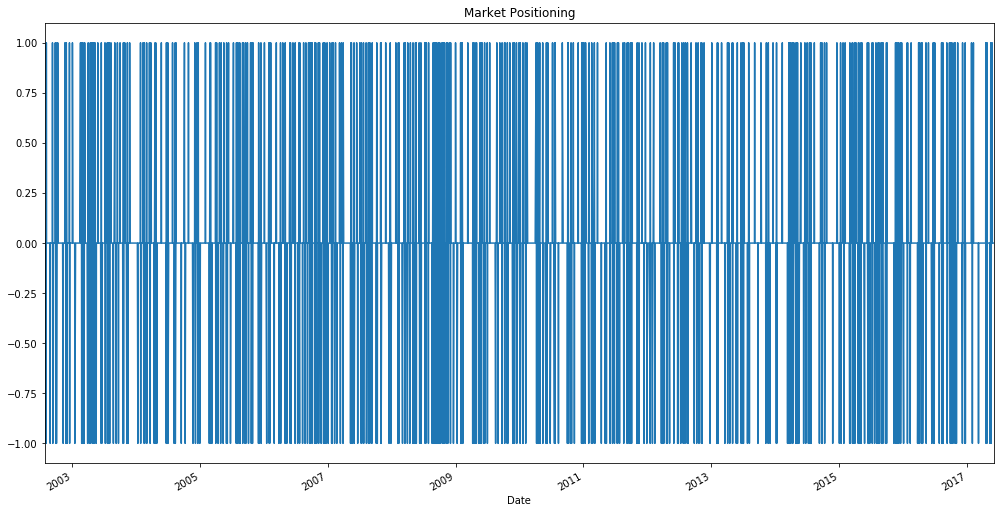

In [83]:
spy['position'] = spy['sma5sig']
spy['positions'] = -1 * spy['sma5sig']
data = pd.DataFrame(spy)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(17,9))
plt.show()

In [90]:
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['returnss'] = -1 * (np.log(data['Close'] / data['Close'].shift(1)))

data['strategyl'] = data['position'].shift(1) * data['returns']
data['strategys'] = data['positions'].shift(1) * data['returnss']
data['LS'] = data['strategyl'] + data['strategys']
data[['returns', 'strategyl','returnss', 'strategys']].sum()

returns      0.887269
strategyl   -0.324225
returnss    -0.887269
strategys   -0.324225
dtype: float64

In [87]:
data

,Open,High,Low,Close,Volume,DEMA20,Close(-1),DEMA20(-1),Close(-2),DEMA20(-2),sma5sig,sma5str,position,positions,returns,returnss,strategyl,strategys,LS
Date,,,,,,,,,,,,,,,,,,,
2002-07-30,86.35,87.75,85.41,87.05,15045200,81.605175,86.72,80.907976,82.85,80.193801,0,1,0,0,NaN,NaN,NaN,NaN,NaN
2002-07-31,86.63,87.39,85.40,87.15,10432300,82.243426,87.05,81.605175,86.72,80.907976,0,1,0,0,0.001148,-0.001148,0.000000,-0.000000,0.0
2002-08-01,86.86,87.27,84.76,84.87,12663900,82.396792,87.15,82.243426,87.05,81.605175,0,1,0,0,-0.026510,0.026510,-0.000000,0.000000,0.0
2002-08-02,84.70,85.15,82.03,83.20,12910400,82.241822,84.87,82.396792,87.15,82.243426,0,1,0,0,-0.019873,0.019873,-0.000000,0.000000,0.0
2002-08-05,82.90,83.25,80.30,80.47,8546900,81.628417,83.20,82.241822,84.87,82.396792,0,1,0,0,-0.033363,0.033363,-0.000000,0.000000,0.0
2002-08-06,82.05,84.33,81.85,83.00,12067200,81.574737,80.47,81.628417,83.20,82.241822,-1,1,-1,1,0.030956,-0.030956,0.000000,-0.000000,0.0
2002-08-07,84.01,84.85,82.25,84.65,12673300,81.843043,83.00,81.574737,80.47,81.628417,1,1,1,-1,0.019685,-0.019685,-0.019685,0.019685,0.0
2002-08-08,85.08,87.35,84.34,87.25,14168600,82.559791,84.65,81.843043,83.00,81.574737,0,1,0,0,0.030252,-0.030252,0.030252,-0.030252,0.0
2002-08-09,86.55,88.24,85.82,87.60,12653400,83.252551,87.25,82.559791,84.65,81.843043,0,1,0,0,0.004003,-0.004003,0.000000,-0.000000,0.0


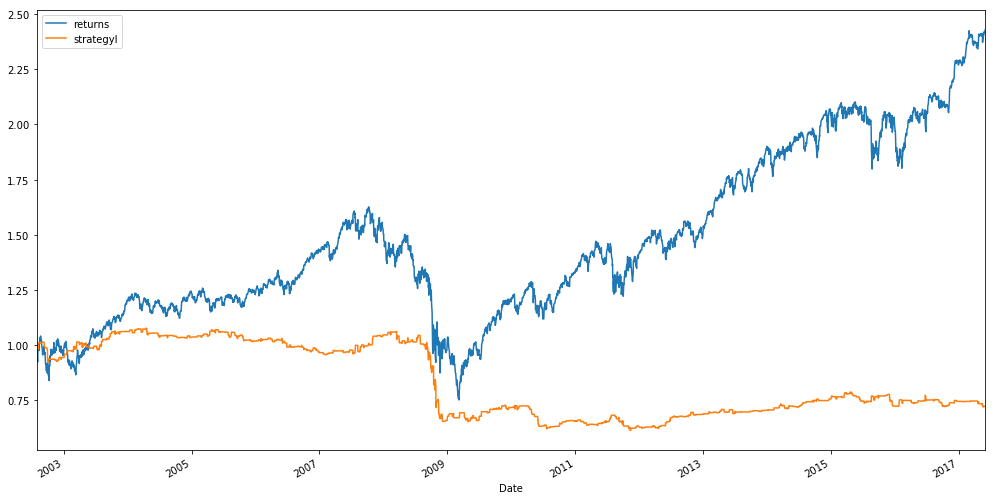

In [101]:
data[['returns', 'strategyl']].cumsum().apply(np.exp).plot(figsize=(17, 9))
plt.show()

In [105]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import talib as ta
import datetime

## 1. Download 15 yrs DJIA
start = datetime.datetime(2002, 6, 1)
end = datetime.datetime(2017, 6, 1)

spy = data.DataReader('DIA',  'google', start, end)
#data = data['Close']
#returns = np.log(data / data.shift(1))

# 2. Simple Moving Average SMA(20) Calculation and Chart
# Technical Indicator Calculation

spy['DEMA20'] = ta.DEMA(np.asarray(spy['Close']), 20)


spy.tail()

,Open,High,Low,Close,Volume,DEMA20
Date,,,,,,
2017-05-25,210.52,210.92,210.30,210.58,2198248,209.405918
2017-05-26,210.54,210.72,210.32,210.54,1152162,209.665352
2017-05-30,210.21,210.52,209.97,210.21,1066624,209.825792
2017-05-31,210.41,210.41,209.32,210.00,1577523,209.922517
2017-06-01,210.27,211.40,209.91,211.40,1827924,210.256367


In [114]:
spy['LPos'] = 0
spy['LPos'][spy.Close>spy.DEMA20] = 1
spy['LPos']=spy['LPos'].shift(1)
spy['SPos'] = 0
spy['SPos'][spy.Close<spy.DEMA20] = 1
spy['SPos']=spy['SPos'].shift(1)
spy['returns']=spy['Close'] / spy['Close'].shift(1) - 1
spy.tail()

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Open,High,Low,Close,Volume,DEMA20,LPos,SPos,returns
Date,,,,,,,,,
2017-05-25,210.52,210.92,210.30,210.58,2198248,209.405918,1.0,0.0,0.003622
2017-05-26,210.54,210.72,210.32,210.54,1152162,209.665352,1.0,0.0,-0.000190
2017-05-30,210.21,210.52,209.97,210.21,1066624,209.825792,1.0,0.0,-0.001567
2017-05-31,210.41,210.41,209.32,210.00,1577523,209.922517,1.0,0.0,-0.000999
2017-06-01,210.27,211.40,209.91,211.40,1827924,210.256367,1.0,0.0,0.006667


In [120]:
spy['Lret']=spy['returns']*spy['LPos']
spy['Sret']=spy['returns']*spy['SPos']
spy['Totret']=spy['Lret'] + spy['Sret']
spy['cumreturns']=(1+spy.Totret).cumprod()
spy['BchMrk']=(1+spy.returns).cumprod()
spy.tail()

,Open,High,Low,Close,Volume,DEMA20,LPos,SPos,returns,Lret,Sret,Totret,cumreturns,BchMrk
Date,,,,,,,,,,,,,,
2017-05-25,210.52,210.92,210.30,210.58,2198248,209.405918,1.0,0.0,0.003622,0.003622,0.0,0.003622,2.541702,2.172047
2017-05-26,210.54,210.72,210.32,210.54,1152162,209.665352,1.0,0.0,-0.000190,-0.000190,-0.0,-0.000190,2.541219,2.171635
2017-05-30,210.21,210.52,209.97,210.21,1066624,209.825792,1.0,0.0,-0.001567,-0.001567,-0.0,-0.001567,2.537236,2.168231
2017-05-31,210.41,210.41,209.32,210.00,1577523,209.922517,1.0,0.0,-0.000999,-0.000999,-0.0,-0.000999,2.534701,2.166065
2017-06-01,210.27,211.40,209.91,211.40,1827924,210.256367,1.0,0.0,0.006667,0.006667,0.0,0.006667,2.551599,2.180505


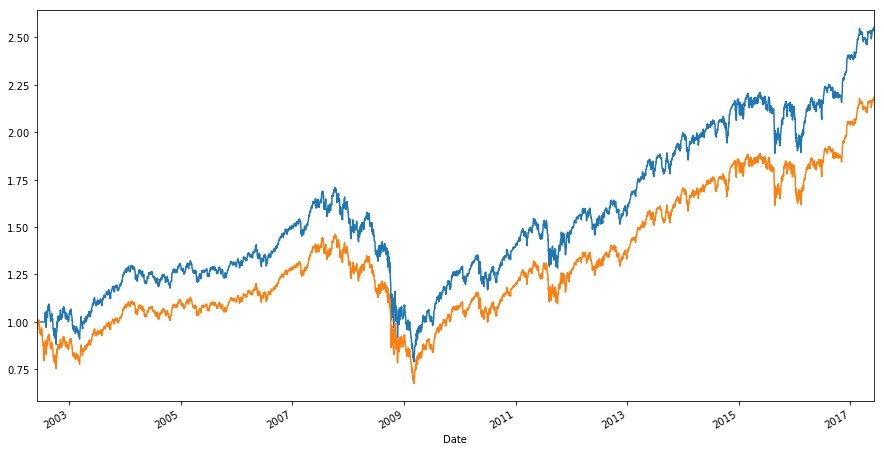

In [129]:
spy.cumreturns.plot(figsize=(15,8))
spy.BchMrk.plot(figsize=(15,8))
plt.show()

# Technical Indicator Chart


#spy.plot(y=['cumreturns'],figsize=(15,8))
#spy.plot(y=['BchMrk'],figsize=(15,8)
#plt.show()